# Stock Kelly Geometric Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def kelly_fraction(stock_returns):
    # returns = np.array(stock_returns)
    wins = stock_returns[stock_returns > 0]
    losses = stock_returns[stock_returns <= 0]
    W = len(wins) / len(stock_returns)
    R = np.mean(wins) / np.abs(np.mean(losses))
    kelly_f = W - ( (1 - W) / R )
    return kelly_f

def expected_geom(stock_returns):
    stock_returns = np.array(stock_returns)
    expected_geom = np.product(1 + stock_returns) ** (1 / len(stock_returns)) - 1
    return expected_geom

def kelly_geometric(stock_returns):
    bounded_rets = stock_returns / np.abs(np.min(stock_returns))
    kelly_f = kelly_fraction(bounded_rets) / np.abs(np.min(stock_returns))
    exp_geom_kelly = expected_geom(bounded_rets * kelly_f)
    return exp_geom_kelly

Text(0, 0.5, 'Kelly Geometric')

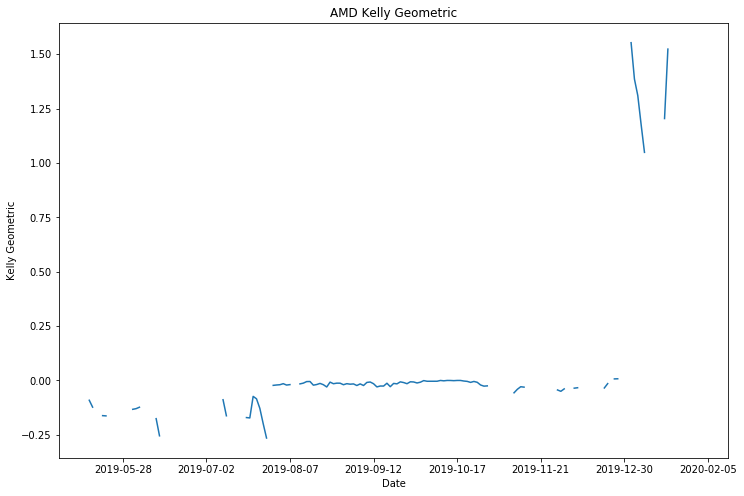

In [6]:
# Compute the running Kelly Geometric
running = [kelly_geometric(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Kelly Geometric up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Kelly Geometric')
plt.xlabel('Date')
plt.ylabel('Kelly Geometric')

In [7]:
kg = kelly_geometric(stocks_returns)
kg

-0.0059780080556488535

In [8]:
running

[-0.09102040457522853,
 -0.12268138473181844,
 nan,
 nan,
 -0.16172617922412658,
 -0.16286073973618997,
 nan,
 nan,
 nan,
 nan,
 -0.10699153660002925,
 nan,
 nan,
 -0.13264595513369126,
 -0.12960313417553115,
 -0.12303120407768486,
 nan,
 nan,
 0.08985885039884378,
 nan,
 -0.17561978300599634,
 -0.2544528698354358,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.23438412088232008,
 nan,
 nan,
 -0.21453914780805272,
 nan,
 -0.25388184503351063,
 nan,
 nan,
 nan,
 -0.24583551156146344,
 nan,
 nan,
 nan,
 -0.08867129016680608,
 -0.16239158873267945,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.17057835767415463,
 -0.17229609663285173,
 -0.07318252142501602,
 -0.08429466303904731,
 -0.1282068600294204,
 -0.19846406252525228,
 -0.2646528299258952,
 nan,
 -0.02256189060953362,
 -0.02082013222159007,
 -0.019592852152669815,
 -0.014829773899328047,
 -0.021202316333056137,
 -0.019117221608571544,
 nan,
 nan,
 -0.015751610886776013,
 -0.012330118561535874,
 -0.005160455808584707,
 -0.004816258262996143,
 -0.021646472251

In [9]:
print('Expected Value (Geometric): {}%'.format(np.round(kelly_geometric(stocks_returns) * 100, 5)))

Expected Value (Geometric): -0.5978%
